EE 399 HW2  

Shaunak Bhide  
Yale faces data set  
https://github.com/gitbheeds/EE399-Work


In [2]:
#import cell
import numpy as np
from scipy.io import loadmat
import matplotlib.pyplot as plt

In [3]:
#load in yalefaces
results = loadmat('yalefaces.mat')
X = results['X']

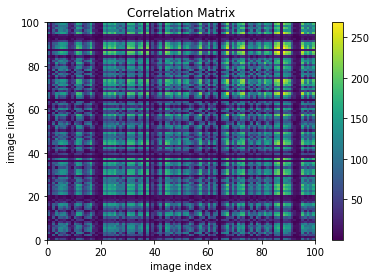

In [7]:
#part a
#first 100 colums of X
X_100 = X[:, :100]

#compute correlation mat
C = np.dot(X_100.T, X_100)

plt.pcolor(C)
plt.colorbar()

plt.title("Correlation Matrix")
plt.xlabel("image index")
plt.ylabel("image index")
plt.show()


Text(0.5, 1.0, 'Image 65 and Image 65 (Low correlation)')

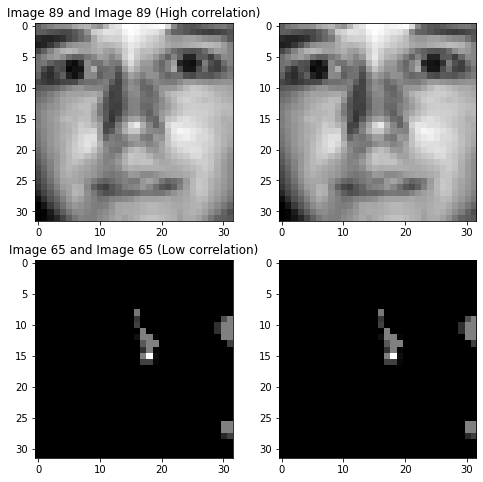

In [8]:
#part b: finding most and least correlated faces
max_index = np.unravel_index(np.argmax(C - np.eye(C.shape[0])), C.shape)
max1 = X_100[:, max_index[0]]
max2 = X_100[:, max_index[1]]

#least correlated
min_index = np.unravel_index(np.argmin(C - np.eye(C.shape[0])), C.shape)
min1 = X_100[:, min_index[0]]
min2 = X_100[:, min_index[1]]

fig, ax = plt.subplots(nrows = 2, ncols = 2, figsize = (8,8))
ax[0,0].imshow(max1.reshape((32,32), order='F').T, cmap = 'gray')

ax[0,1].imshow(max2.reshape((32,32), order='F').T, cmap = 'gray')

ax[0,0].set_title("Image {} and Image {} (High correlation)".format(max_index[0]+1, max_index[1]+1))

ax[1,0].imshow(min1.reshape((32,32), order='F').T, cmap = 'gray')

ax[1,1].imshow(min2.reshape((32,32), order='F').T, cmap = 'gray')

ax[1,0].set_title("Image {} and Image {} (Low correlation)".format(min_index[0]+1, min_index[1]+1))


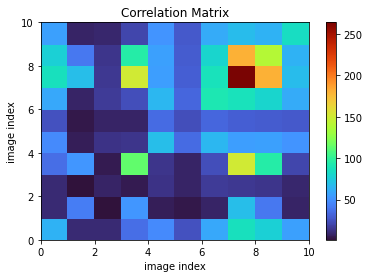

In [10]:
#part c
#correlation matrix for specified indicies
#i-1 from problem statement to match python
idx_sel = [0, 312, 511, 4, 2399, 112, 1023, 86, 313, 2004]

#extract images
X_sel = X[:, idx_sel]

#correlation matrix
C_sel = np.dot(X_sel.T, X_sel)

#plot
plt.pcolor(C_sel, cmap = 'turbo')
plt.colorbar()

plt.title("Correlation Matrix")
plt.xlabel("image index")
plt.ylabel("image index")
plt.show()


In [11]:
#part D: eigenvectors of Y = XX.T

#compute Y
Y = np.dot(X, X.T)
eigval, eigvec = np.linalg.eigh(Y)

#sort eigvals in ascending order
idx = np.argsort(eigval)[::-1]
high_6 = eigvec[:, idx[:6]]

#normalize
norm = np.linalg.norm(high_6, axis = 0)
evec_norm = high_6 / norm

#print the six eigenvectors with the highest magnitude eigenvalues
for i in range(6) :
    print(f"Eigenvector {i + 1}:")
    print(evec_norm[:, i], "\n")

Eigenvector 1:
[-0.02384327 -0.02576146 -0.02728448 ... -0.02082937 -0.0193902
 -0.0166019 ] 

Eigenvector 2:
[ 0.04535378  0.04567536  0.04474528 ... -0.03737158 -0.03557383
 -0.02965746] 

Eigenvector 3:
[-0.05653196 -0.04709124 -0.0362807  ... -0.06455006 -0.06196898
 -0.05241684] 

Eigenvector 4:
[ 0.04441826  0.05057969  0.05522219 ... -0.01006919 -0.00355905
  0.00040934] 

Eigenvector 5:
[-0.03378603 -0.01791442 -0.00462854 ...  0.06172201  0.05796353
  0.05757412] 

Eigenvector 6:
[0.02207542 0.03378819 0.04487476 ... 0.03025485 0.02850199 0.00941028] 



In [12]:
#part E: SVD of X, finding first 6 principal component directions
U, s, V = np.linalg.svd(X)

#principal component direction
pcd = V[:6,:].T

for i, dirn in enumerate(pcd.T) :
    print(f"Principal Component Direction {i + 1}:")
    print(dirn, "\n")



Principal Component Direction 1:
[-0.01219331 -0.00215188 -0.01056679 ... -0.02177117 -0.03015309
 -0.0257889 ] 

Principal Component Direction 2:
[-0.01938848 -0.00195186  0.02471869 ...  0.04027773  0.00219562
  0.01553129] 

Principal Component Direction 3:
[ 0.01691206  0.00143586  0.0384465  ...  0.01340245 -0.01883373
  0.00643709] 

Principal Component Direction 4:
[ 0.0204079  -0.01201431  0.00397553 ... -0.01641295 -0.04011563
  0.02679029] 

Principal Component Direction 5:
[-0.01902342  0.00418948  0.0384026  ... -0.01092512  0.00087341
  0.01260435] 

Principal Component Direction 6:
[-0.0090084  -0.00624237  0.01580824 ... -0.00977639  0.00090316
  0.00304479] 



In [13]:
#part F: comparing eigenvector to SVD mode
eig1 = evec_norm[:, 0]
u1 = U[:, 0]

norm_diff = np.linalg.norm(np.abs(eig1) - np.abs(u1))

print("Norm of difference with absolute values of first eigenvector and first SVD mode: ", norm_diff)

Norm of difference with absolute values of first eigenvector and first SVD mode:  7.394705201660225e-16


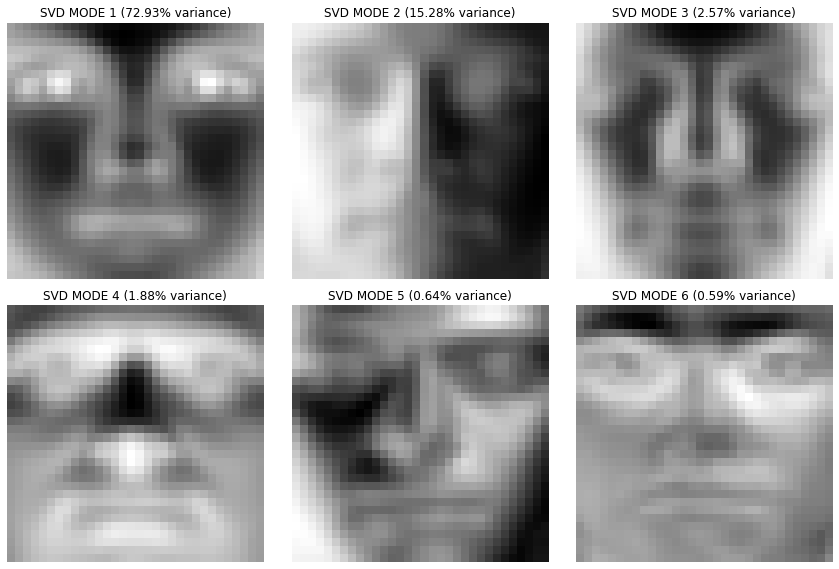

In [14]:
#part G: percentage of variance of 6 SVD modes

#sum of squares of projections onto each SVD mode
ss_proj = np.sum((X.T @ U[:, :6]) ** 2, axis = 0)

#total sum of squares of original data
data_variance = np.sum(X**2)

#percentage of variance
var_percent = (ss_proj / data_variance) * 100

#plot the first 6 SVD modes with variance indicated
fig, axs = plt.subplots(2, 3, figsize=(12,8))
axs = axs.flatten()

for i in range(6) :
    axs[i].imshow(np.reshape(U[:, i], (32, 32)), cmap="gray")
    axs[i].set_title(f"SVD MODE {i+1} ({var_percent[i]:.2f}% variance)")
    axs[i].axis("off")
plt.tight_layout()
plt.show()
